<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [ ]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

#### Install the required libraries and import them


In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Connect to the SQLite database


In [ ]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [ ]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


**Demo 2: List all tables**


In [ ]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


**Demo 3: Group data by age**


In [ ]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


## Hands-on Lab: Visualizing Data with Histograms


In [2]:
# Read the CSV file
df = pd.read_csv('../module3/survey_data_final_m3.csv')

# Display the first few rows of the data
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,WorkedWith_Python,WorkedWith_JavaScript,WorkedWith_R,WorkedWith_TypeScript,WorkedWith_Lua,WorkedWith_HTML/CSS,WorkedWith_Kotlin,WorkedWith_C++,WorkedWith_PowerShell,Age_numeric
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary school,Books / Physical media,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,Bachelor's degree,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,39.5
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,Master's degree,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,49.5
3,4,I am learning to code,18-24 years old,"Student, full-time",No,Apples,NaN,Some college,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,21.0
4,5,I am a developer by profession,18-24 years old,"Student, full-time",No,Apples,NaN,Secondary school,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,21.0


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


<Axes: >

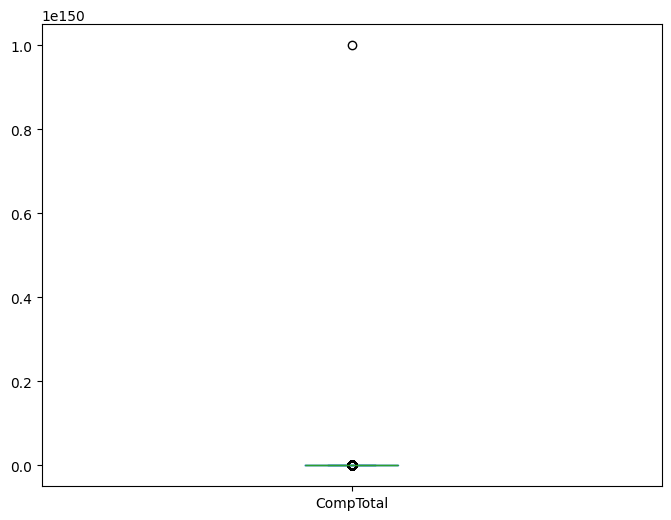

In [3]:
## Write your code here
df.plot(kind='box', y='CompTotal', figsize=(8, 6))

LOOK AT THE PREVIOUS LAB

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


<Axes: ylabel='Frequency'>

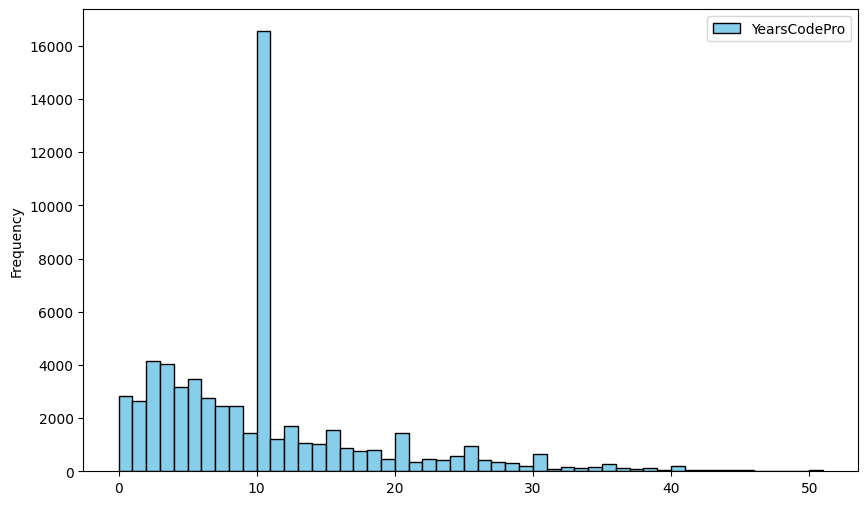

In [14]:
## Write your code here
df.plot(kind='hist', y='YearsCodePro', bins=51, figsize=(10, 6), color='skyblue', edgecolor='black')

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


In [15]:
## Write your code here
#removing the filled data 
df_comp_total = df[df['CompTotal'] != 110000.0]
max_comp = df_comp_total['CompTotal'].max()
print(f"The maximum compensation is: {max_comp}")
print(df_comp_total.drop(df_comp_total[df_comp_total['CompTotal'] > 1000000].index, inplace=True))
# lets remove the outlier
q1 = df_comp_total['CompTotal'].quantile(0.25)
q3 = df_comp_total['CompTotal'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df_comp_total[(df_comp_total['CompTotal'] < lower_bound) | (df_comp_total['CompTotal'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")


The maximum compensation is: 1.0000000000000002e+150
None
Number of outliers: 3242


C:\Users\akar\AppData\Local\Temp\ipykernel_23716\2248670628.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  print(df_comp_total.drop(df_comp_total[df_comp_total['CompTotal'] > 1000000].index, inplace=True))


In [16]:
#dropping outliers
df_comp_total.drop(outliers.index, inplace=True)
max_comp = df_comp_total['CompTotal'].max()
print(f"The maximum compensation is: {max_comp}")

The maximum compensation is: 331348.0


C:\Users\akar\AppData\Local\Temp\ipykernel_23716\2149973689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_total.drop(outliers.index, inplace=True)


In [38]:
df_cleaned = df[df['Age'] != 'Prefer not to say']
df_cleaned['Age'].value_counts()

Age
25-34 years old       23237
35-44 years old       14241
18-24 years old       13916
45-54 years old        5914
Under 18 years old     2451
55-64 years old        2447
65 years or older       759
Name: count, dtype: int64

<Axes: xlabel='CompTotal', ylabel='Count'>

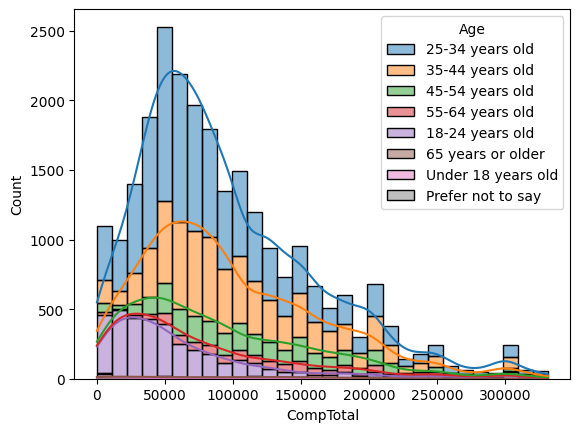

In [30]:
# df_comp_total.plot(kind='hist', x='Age', y='CompTotal', bins=20, figsize=(10, 6), color='skyblue', edgecolor='black', alpha=0.5)
sns.histplot(data=df_comp_total, hue='Age', x='CompTotal', bins=30, pthresh=0.1, alpha=0.5, multiple='stack', kde=True)

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


In [37]:
df['Age'].value_counts()

Age
25-34 years old       23237
35-44 years old       14241
18-24 years old       13916
45-54 years old        5914
Under 18 years old     2451
55-64 years old        2447
65 years or older       759
Prefer not to say       219
Name: count, dtype: int64

([0, 1, 2, 3, 4],
 [Text(0, 0, '30-60 minutes a day'),
  Text(1, 0, '60-120 minutes a day'),
  Text(2, 0, '15-30 minutes a day'),
  Text(3, 0, 'Less than 15 minutes a day'),
  Text(4, 0, 'Over 120 minutes a day')])

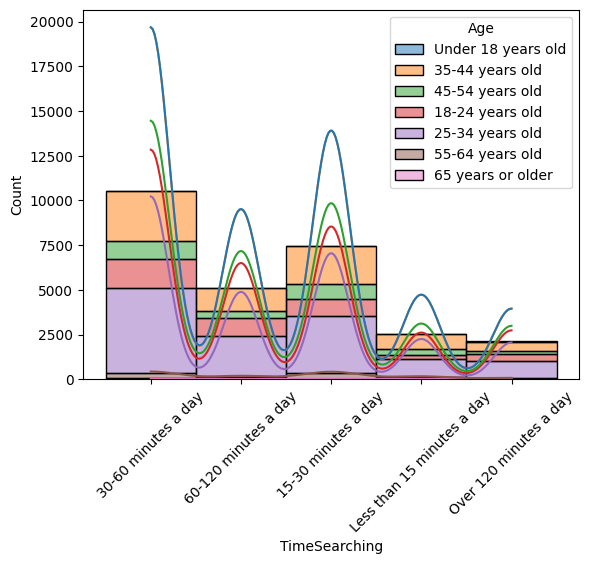

In [39]:
## Write your code here
sns.histplot(data=df_cleaned, x='TimeSearching', hue='Age', bins=30, kde=True, edgecolor='black', pthresh=0.1, alpha=0.5, multiple='stack')
plt.xticks(rotation=45)

In [49]:
df['TimeSearching'].value_counts()


TimeSearching
30-60 minutes a day           10542
15-30 minutes a day            7484
60-120 minutes a day           5099
Less than 15 minutes a day     2554
Over 120 minutes a day         2120
Name: count, dtype: int64

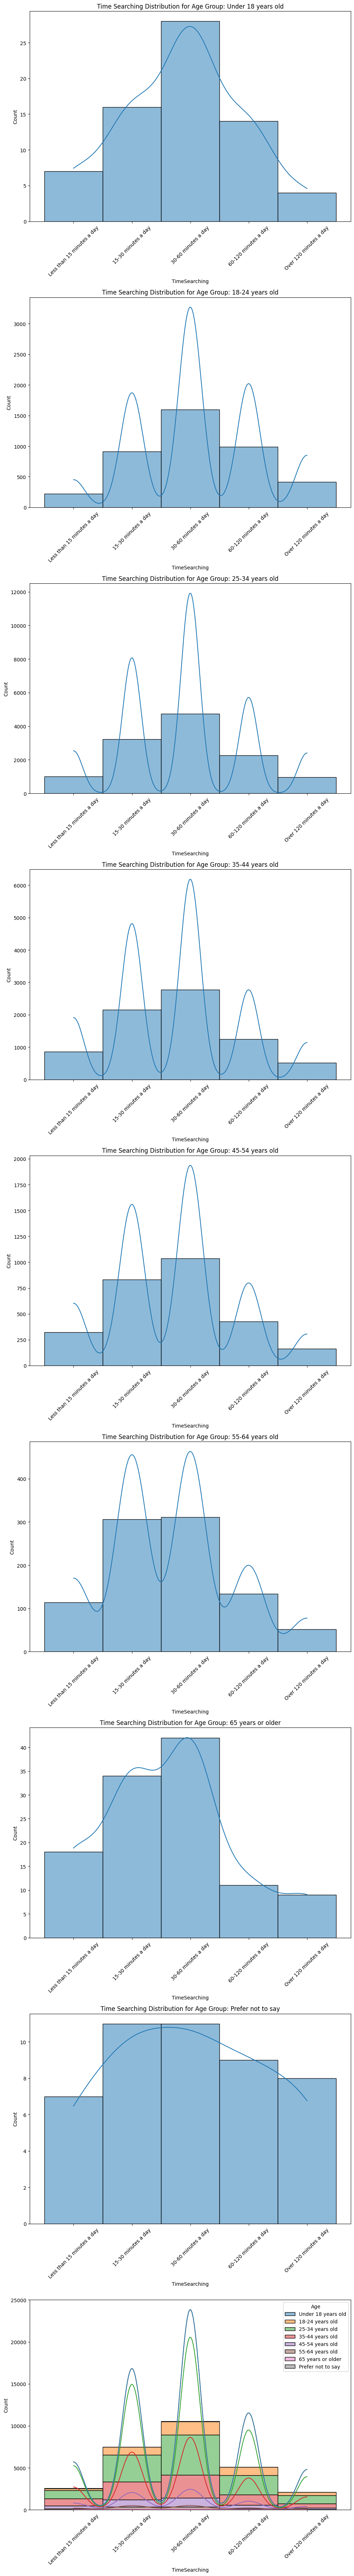

In [65]:
# Define the correct order for TimeSearching from least to most time
time_order = [
    'Less than 15 minutes a day',
    '15-30 minutes a day', 
    '30-60 minutes a day',
    '60-120 minutes a day',
    'Over 120 minutes a day'
]
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

# Convert TimeSearching to categorical with the specified order
df['TimeSearching'] = pd.Categorical(df['TimeSearching'], categories=time_order, ordered=True)
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)
# Get age groups sorted by count (smallest to largest)
age_counts = df['Age'].unique().sort_values()  
g_num = len(age_counts)

# Create subplots
fig, axes = plt.subplots(nrows=g_num+1, ncols=1, figsize=(10, 8 * (g_num + 1)))

for i, value in enumerate(age_counts):
    age_data = df[df['Age'] == value]
    sns.histplot(data=age_data, x='TimeSearching', kde=True, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_title(f"Time Searching Distribution for Age Group: {value}")

sns.histplot(data=df, x='TimeSearching', kde=True, ax=axes[g_num], hue='Age', pthresh=0.1, alpha=0.5, multiple='stack')
plt.xticks(rotation=45)
plt.subplots_adjust(hspace=1)
plt.tight_layout()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


In [67]:
df['DatabaseWantToWorkWith'].value_counts()
unique_values_in_db = df['DatabaseWantToWorkWith'].unique()
unique_items = set(x for i in unique_values_in_db for x in str(i).split(';'))
unique_items.discard('nan')
df_db = pd.DataFrame(
    {
        'Database': list(unique_items),
        'Count': [df['DatabaseWantToWorkWith'].str.contains(item, na=False).sum() for item in unique_items]
    }
)
df_db.head()

,Database,Count
0,Microsoft SQL Server,7710
1,Cockroachdb,1074
2,EventStoreDB,353
3,Couch DB,595
4,Cloud Firestore,2054


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'PostgreSQL'),
  Text(1, 0, 'SQLite'),
  Text(2, 0, 'MySQL'),
  Text(3, 0, 'MongoDB'),
  Text(4, 0, 'Redis'),
  Text(5, 0, 'Microsoft SQL Server'),
  Text(6, 0, 'Elasticsearch'),
  Text(7, 0, 'MariaDB'),
  Text(8, 0, 'Dynamodb'),
  Text(9, 0, 'Supabase')])

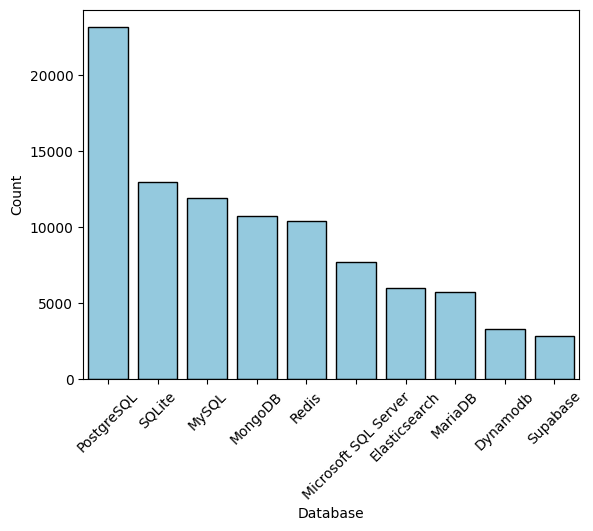

In [83]:
df_db_top_10 = df_db.sort_values(by='Count', ascending=False).head(10)
sns.barplot(data=df_db_top_10, x='Database', y='Count', color='skyblue', edgecolor='black')
plt.xticks(rotation=45)

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


([0, 1, 2, 3],
 [Text(0, 0, 'Remote'),
  Text(1, 0, 'No'),
  Text(2, 0, 'In-person'),
  Text(3, 0, 'Hybrid (some remote, some in-person)')])

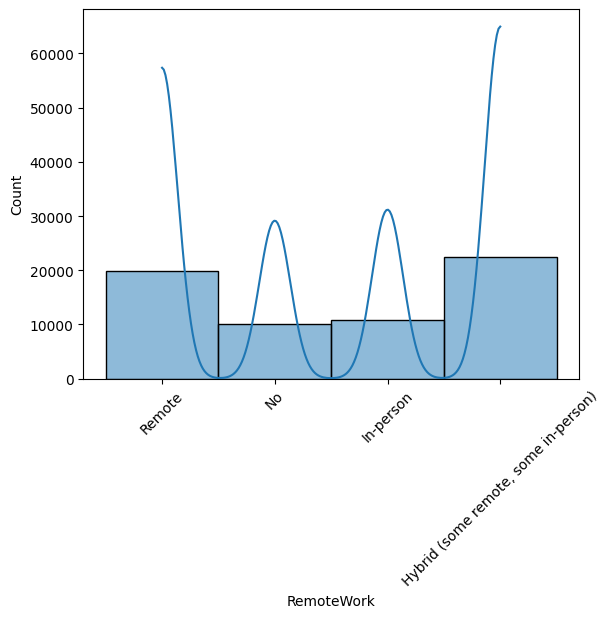

In [86]:
## Write your code here
sns.histplot(data=df, x='RemoteWork', bins='auto', kde=True, edgecolor='black', pthresh=0.1, alpha=0.5)
plt.xticks(rotation=45)

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


Text(0.5, 1.0, 'Compensation Distribution for Age Group: 45-54 years old')

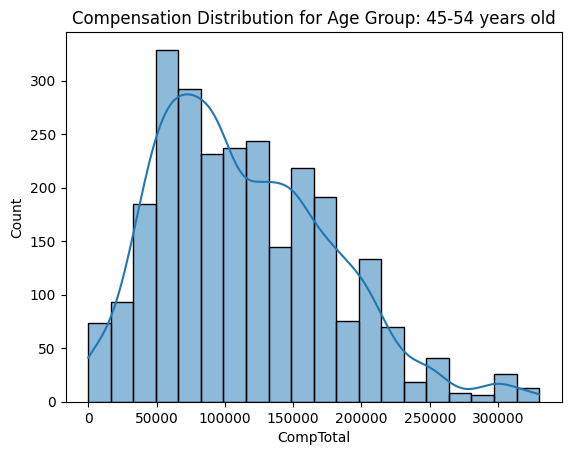

In [89]:
## Write your code here
df_comp_total_45 = df_comp_total[df_comp_total['Age'] == '45-54 years old']
sns.histplot(data=df_comp_total_45, x='CompTotal', bins=20, kde=True, edgecolor='black', pthresh=0.1, alpha=0.5)
plt.title('Compensation Distribution for Age Group: 45-54 years old')


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [92]:
df['YearsCodeProBins'].value_counts()

YearsCodeProBins
10-20    24377
0-5      17415
5-10     12193
>20       6380
Name: count, dtype: int64

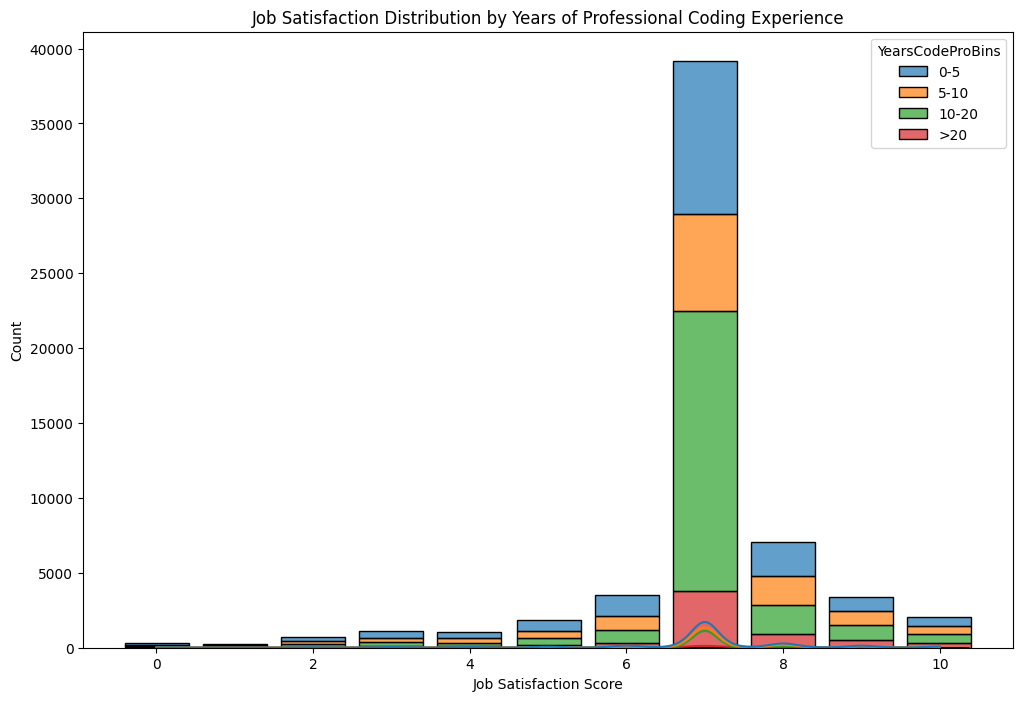

In [100]:
## Write your code here
# Create bins for YearsCodePro to group the data
df['YearsCodeProBins'] = pd.cut(df['YearsCodePro'], 
                                bins=[0, 5, 10, 20, float('inf')], 
                                labels=['0-5', '5-10', '10-20', '>20'])

# Plot histogram of JobSat by YearsCodePro bins
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='JobSat', hue='YearsCodeProBins', 
             bins='auto', kde=True, alpha=0.7, multiple='stack', shrink=40)
plt.title('Job Satisfaction Distribution by Years of Professional Coding Experience')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Count')
# plt.legend(title='Years of Professional Coding Experience')
plt.show()

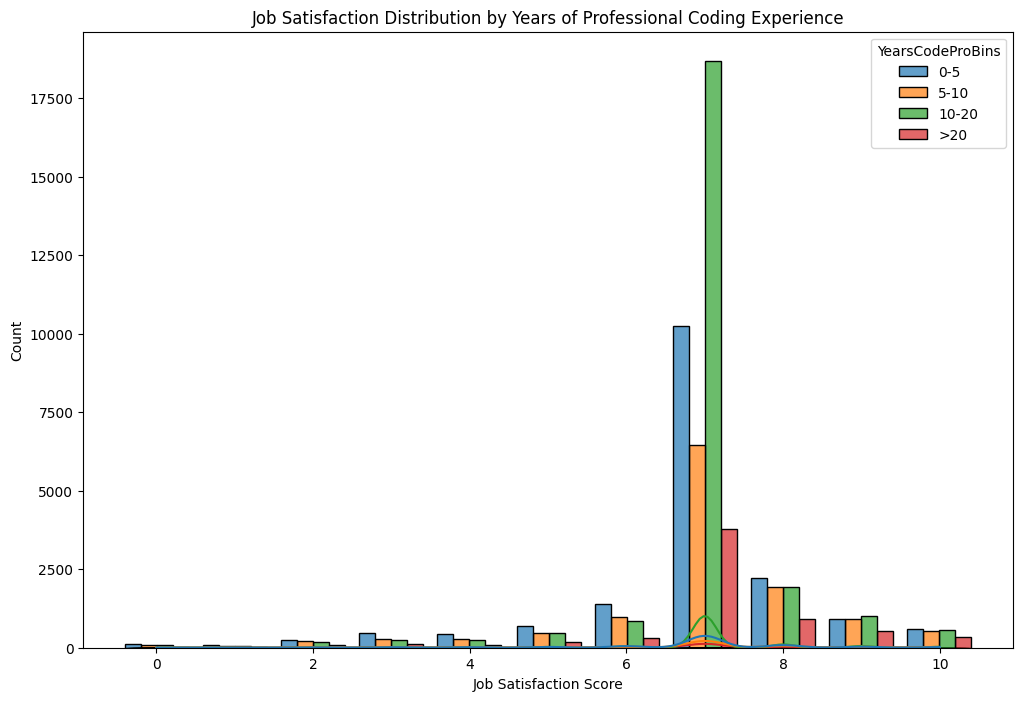

In [105]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='JobSat', hue='YearsCodeProBins', 
             bins='auto', kde=True, alpha=0.7, multiple='dodge', shrink=40)
plt.title('Job Satisfaction Distribution by Years of Professional Coding Experience')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Count')
# plt.legend(title='Years of Professional Coding Experience')
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
